In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
import re
plt.rcParams['font.family'] = 'NanumGothic'

In [134]:
df_car = pd.read_csv('./resources/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc-kr')
df_car

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [135]:
df_car.columns = ['brand','car_model','prod_start','prod_end','recall_date','reason']
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        1419 non-null   object
 1   car_model    1419 non-null   object
 2   prod_start   1419 non-null   object
 3   prod_end     1419 non-null   object
 4   recall_date  1419 non-null   object
 5   reason       1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


In [136]:
df_car['prod_start'] = pd.to_datetime(df_car.prod_start)
df_car['prod_end'] = pd.to_datetime(df_car.prod_end)
df_car['recall_date'] = pd.to_datetime(df_car.recall_date)
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   brand        1419 non-null   object        
 1   car_model    1419 non-null   object        
 2   prod_start   1419 non-null   datetime64[ns]
 3   prod_end     1419 non-null   datetime64[ns]
 4   recall_date  1419 non-null   datetime64[ns]
 5   reason       1419 non-null   object        
dtypes: datetime64[ns](3), object(3)
memory usage: 66.6+ KB


In [137]:
df_car[df_car.duplicated()==True]

,brand,car_model,prod_start,prod_end,recall_date,reason
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [138]:
df_car.drop_duplicates(inplace=True)
df_car

,brand,car_model,prod_start,prod_end,recall_date,reason
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [139]:
# 1. 제조사별 리콜 현황
df_brand = df_car.brand.value_counts()
df_brand = pd.DataFrame(df_brand)
df_brand.columns = ['count']
df_brand.sort_values('count',ascending=True,inplace=True)
df_brand

,count
(주)스포츠모터사이클코리아,1
기흥인터내셔널 유한회사,1
폴스타오토모티브코리아 유한회사,1
한신특장,1
유한회사 모토로싸,1
주식회사 마이브,1
모토스타코리아(주),2
(주)다산중공업,2
(주) 한국모터트레이딩,3
대전기계공업(주),3


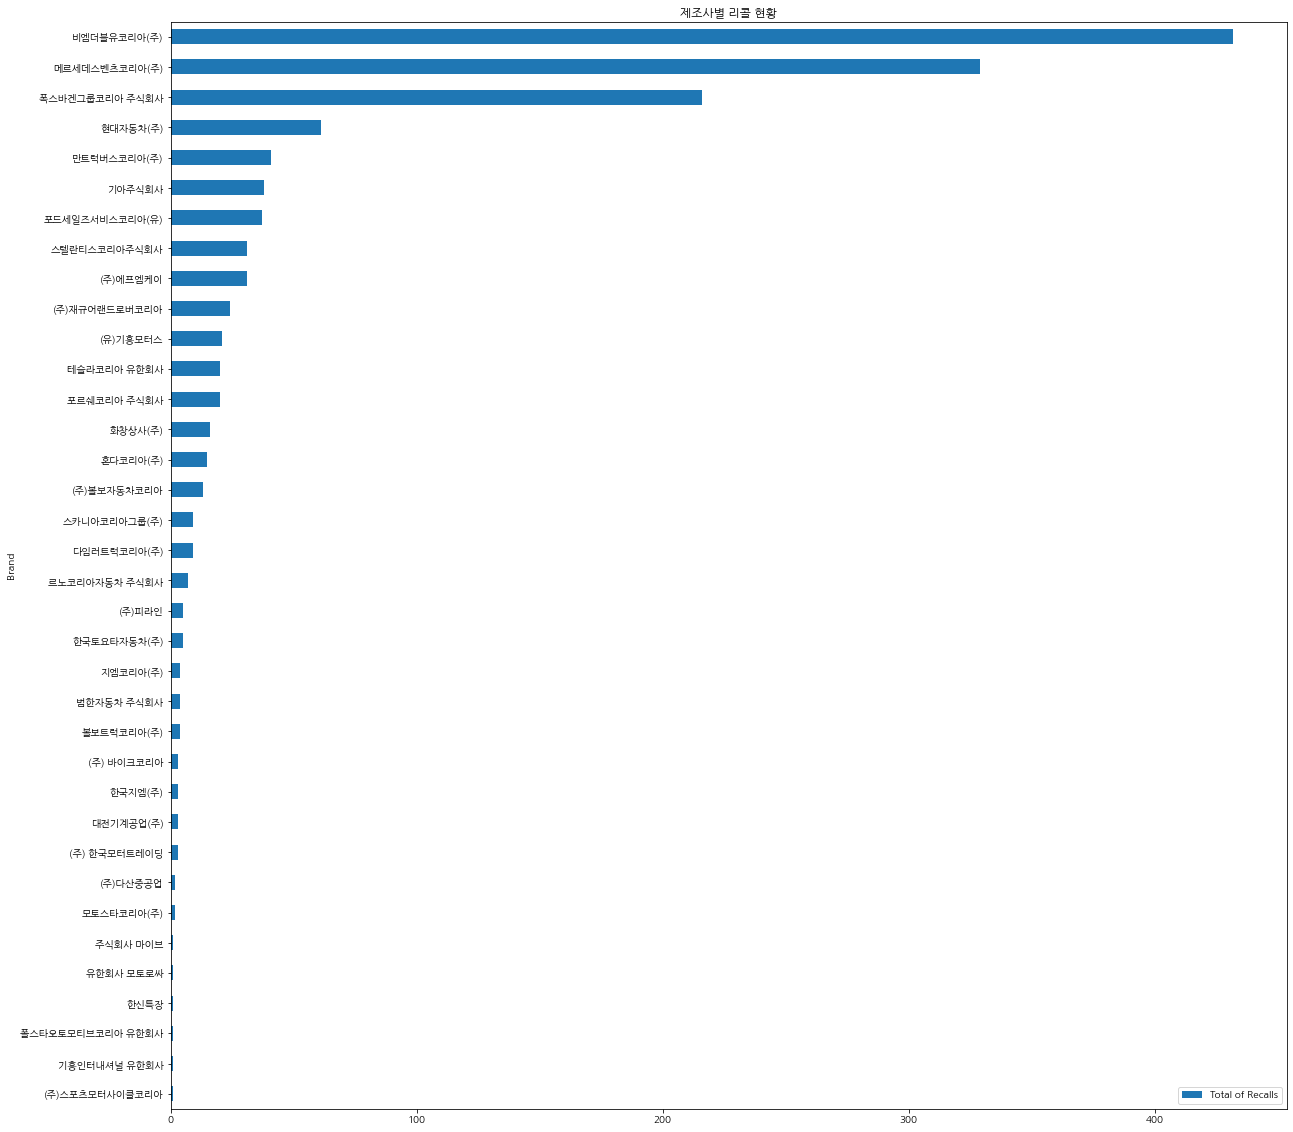

In [140]:
df_brand.plot(kind='barh',title='제조사별 리콜 현황',xlabel='Brand',y='count',label='Total of Recalls',figsize=(20,20))
plt.legend(loc='lower right')
plt.show()

In [141]:
# 2. 모델별 리콜 현황
df_model = df_car.car_model.value_counts()
df_model = pd.DataFrame(df_model)
df_model.columns = ['count']
df_model.sort_values('count',ascending=True,inplace=True)
df_model

,count
530i xDrive,1
Rolls-Royce Ghost,1
Touareg 3 3.0 TDI,1
Touareg 3.0 TDI,1
Touareg 4.0 TDI,1
...,...
328xi,11
C 300,13
TGS,18
TGX,22


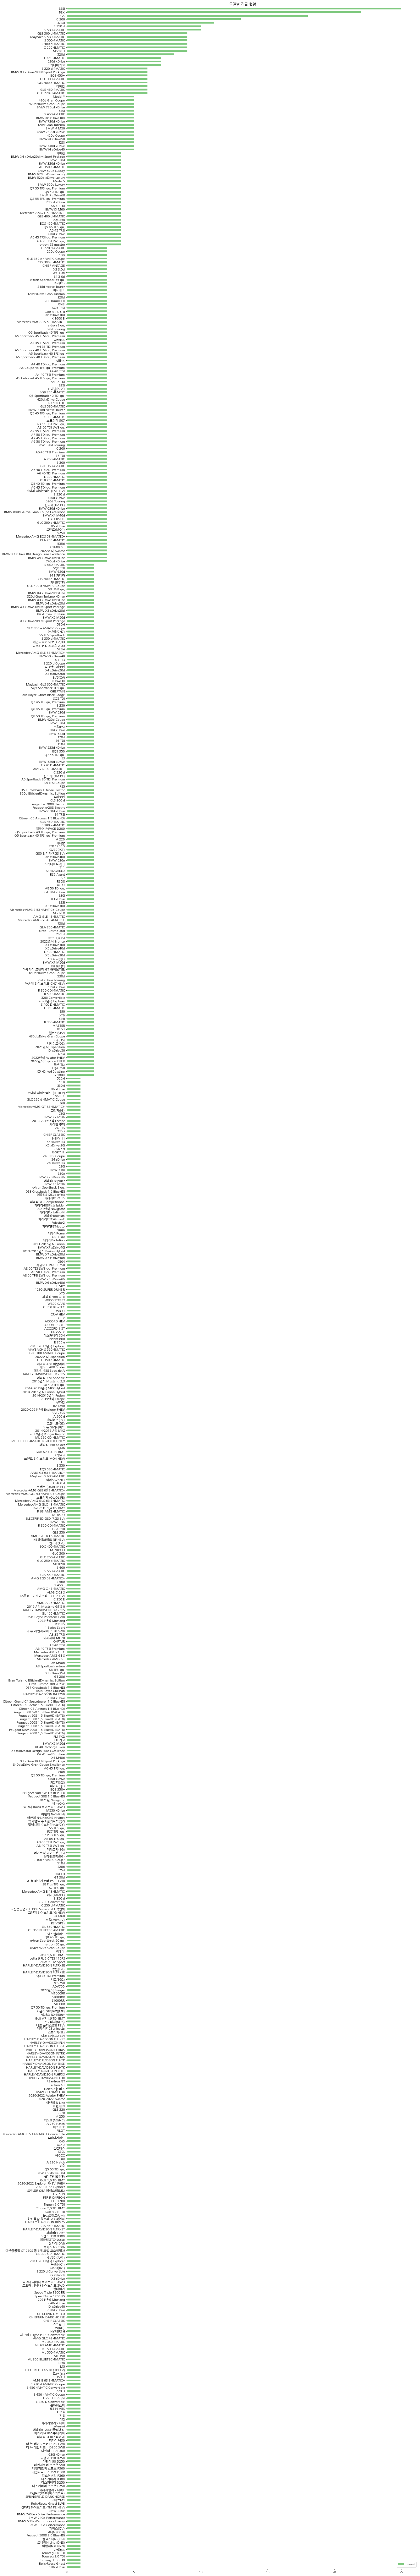

In [142]:
df_model.plot(kind='barh',title='모델별 리콜 현황',figsize=(20,150),colormap='Accent')
plt.show()

In [143]:
# 3. 월별 리콜 현황
df_car['recall_monthly'] = df_car['recall_date'].dt.to_period(freq='M')
df_monthly = df_car.recall_monthly.value_counts()
df_monthly = pd.DataFrame(df_monthly)
df_monthly.sort_index(inplace=True)
df_monthly

,recall_monthly
2022-01,55
2022-02,177
2022-03,122
2022-04,171
2022-05,90
2022-06,152
2022-07,85
2022-08,138
2022-09,87
2022-10,135


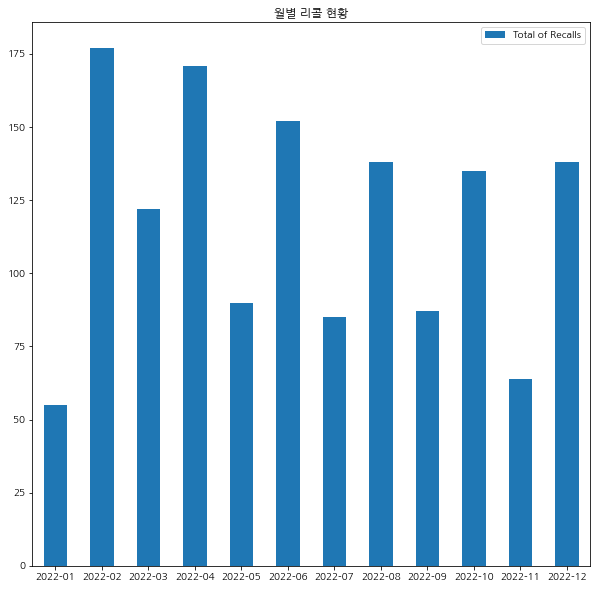

In [144]:
df_monthly.plot(kind='bar',title='월별 리콜 현황',figsize=(10,10),rot=0,y='recall_monthly',label='Total of Recalls')
plt.show()

In [148]:
# 4. 생산 연도별 리콜 현황
# start
df_car['prod_yearly'] = df_car['prod_start'].dt.to_period(freq='Y')
df_prod_year = df_car.prod_yearly.value_counts()
df_prod_year = pd.DataFrame(df_prod_year)
df_prod_year

,prod_yearly
2021,276
2020,273
2019,197
2022,114
2018,113
2017,68
2015,65
2016,61
2014,52
2013,45


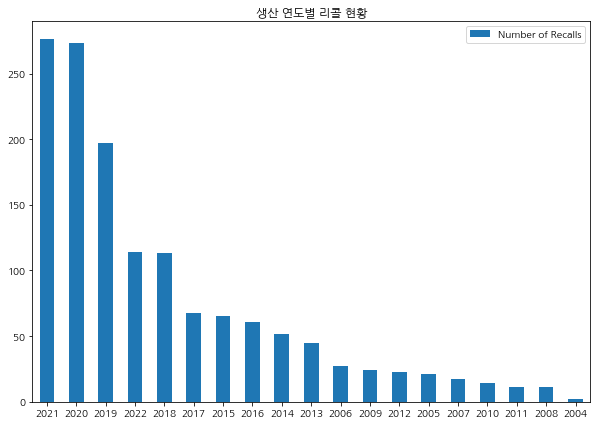

In [153]:
df_prod_year.plot(kind='bar',y='prod_yearly',label='Number of Recalls',figsize=(10,7),rot=0,title='생산 연도별 리콜 현황')
plt.show()

In [145]:
# 5. 리콜 사유 시각화
reason_list = df_car.reason.unique().tolist()
reason_str = ' '.join(reason_list)

In [146]:
nouns = konlpy.tag.Hannanum().nouns(reason_str)
nouns

['제작',
 '공정',
 '중',
 '라디에이터',
 '캡',
 '제조',
 '불량',
 '라디에이터',
 '캡',
 '필러넥',
 '밀착',
 '라디에이터',
 '내부',
 '압력',
 '일정',
 '유',
 '수',
 '이',
 '라디에이터',
 '내부',
 '압력',
 '냉각수',
 '저장',
 '탱크',
 '오버플',
 '튜브',
 '냉각수',
 '분출',
 '수',
 '특정',
 '기간',
 '내',
 '특정',
 '공급',
 '업체(이드낙)',
 '생산',
 '공정',
 '불량',
 '메카트로닉스',
 '내',
 '오일',
 '압력',
 '생성기(어큐뮬레이터)',
 '나사산',
 '가공',
 '사용',
 '기간',
 '중',
 '어큐뮬레이터',
 '하우징',
 '균열',
 '발생',
 '충분한',
 '변',
 '압력',
 '생성',
 '지장',
 '가능성',
 '크랭크샤프트',
 '내구성',
 '부족',
 '엔진',
 '부하',
 '경우',
 '크랭크샤프트',
 '파손',
 '수',
 '연료탱크',
 '압력',
 '센서',
 '고정',
 '클립',
 '내식성',
 '부족',
 '장기간',
 '운행',
 '시',
 '고정',
 '클립',
 '부식',
 '수',
 '고정력',
 '상실',
 '연료',
 '탱크',
 '압력',
 '센서',
 '수',
 '일부',
 '대상',
 '차량',
 '엔진컨트롤유닛',
 '소프트웨어',
 '오류',
 '배기가스',
 '재순환',
 '장치',
 '배관',
 '내',
 '온도',
 '상승',
 '수',
 '쿨러',
 '배기가스',
 '재순환',
 '냉각기',
 '내구성',
 '부족',
 '균열',
 '냉각수',
 '누수',
 '수',
 '자체',
 '품질',
 '조사',
 '결과',
 '2021년',
 '11월',
 '22일',
 '2021년',
 '11월',
 '30일',
 '제작',
 'i4',
 'eDrive40,',
 'i4',
 'M50',
 '차량',
 '72대',
 '차량',
 '생산',
 '과정',
 '

In [154]:
reason_words = pd.DataFrame({'word':nouns})
reason_words

,word
0,제작
1,공정
2,중
3,라디에이터
4,캡
...,...
6568,수
6569,연결
6570,전기
6571,배선


In [156]:
reason_words['count'] = reason_words['word'].str.len()
reason_words = reason_words[(reason_words['count']>=2)]
reason_words['count'] = 1
reason_words

/tmp/ipykernel_135164/3263980907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_words['count'] = reason_words['word'].str.len()


,word,count
0,제작,1
1,공정,1
3,라디에이터,1
5,제조,1
6,불량,1
...,...,...
6567,신호,1
6569,연결,1
6570,전기,1
6571,배선,1


In [160]:
df_wc = reason_words.groupby('word',as_index=False).agg(count=('word','count')).sort_values('count',ascending=False)
df_wc.head(30)

,word,count
1291,차량,177
191,가능성,108
917,오류,96
1018,일부,83
531,발생,82
725,소프트웨어,70
244,경우,55
1036,자동차,54
1352,컨트롤,53
340,기준,52


In [161]:
dic_word = df_wc.set_index('word').to_dict()['count']
dic_word

{'차량': 177,
 '가능성': 108,
 '오류': 96,
 '일부': 83,
 '발생': 82,
 '소프트웨어': 70,
 '경우': 55,
 '자동차': 54,
 '컨트롤': 53,
 '기준': 52,
 '생산': 52,
 '엔진': 46,
 '손상': 45,
 '연료': 43,
 '작동': 43,
 '유닛': 42,
 '내부': 42,
 '에어백': 40,
 '공정': 40,
 '불량': 39,
 '장착': 38,
 '고정': 38,
 '성능': 33,
 '충돌': 32,
 '장치': 31,
 '주행': 31,
 '확인': 30,
 '브레이크': 29,
 '특정': 28,
 '부족': 28,
 '조립': 27,
 '상태': 27,
 '배터리': 26,
 '경고등': 25,
 '센서': 24,
 '시스템': 24,
 '공급': 24,
 '결함': 23,
 '점등': 23,
 '후방': 23,
 '과정': 23,
 '운전자': 21,
 '배선': 19,
 '시트': 19,
 '커넥터': 19,
 '내구성': 19,
 '동안': 18,
 '오일': 18,
 '연결': 18,
 '볼트': 18,
 '위치': 18,
 '분리': 17,
 '뒷좌석': 17,
 '파손': 17,
 '시동': 17,
 '제조': 17,
 '기능': 17,
 '사용': 17,
 '기간': 17,
 '외부': 16,
 '계기판': 16,
 '좌석': 16,
 '규칙': 16,
 '증가': 16,
 '정상적': 16,
 '표시': 15,
 '안전벨트': 15,
 '만족': 15,
 '자동차부품': 15,
 '냉각수': 15,
 '전기': 15,
 '안전띠': 15,
 '부품': 15,
 '탑승자': 15,
 '해당': 14,
 '충족': 14,
 '발견': 14,
 '모듈': 14,
 '설치': 14,
 '수입': 14,
 '변속기': 14,
 '이탈': 14,
 '경고': 14,
 '고전압': 13,
 '체결': 13,
 '사이': 13,
 '전원': 13,
 '고장': 12,
 '

In [162]:
from wordcloud import WordCloud
font = 'NanumGothic'

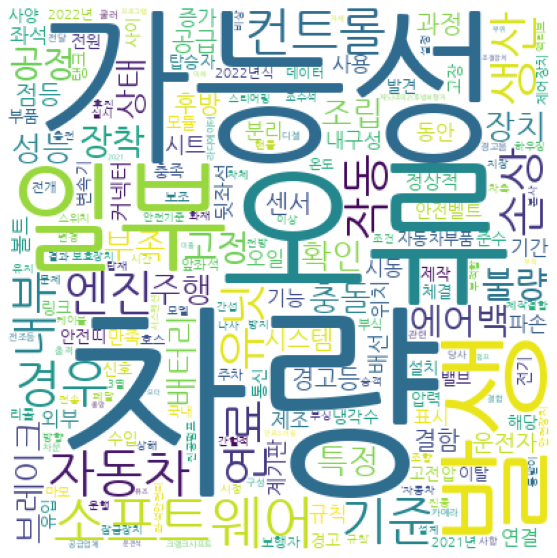

In [164]:
wc = WordCloud(random_state=1234,
               font_path=font,
               width=400,
               height=400,
               background_color='white'
               )

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_wordcloud)